# Reto 5. Construyendo para mejorar la calidad de vida

## Contexto

En cali existen familias que viven en condiciones de pobreza extrema, en barrios donde la violencia y la falta de oportunidades son una constante. En estas condiciones es frecuente que las normas de construcción no se cumplan, lo que pone en riesgo la vida de las personas. Un factor fundamental a tener en cuenta en estos contextos constructivos corresponde a la deflexión (la forma como una estructura responde frente a la accion de una fuerza o carga).  Minimizar la deflexión ayuda a evitar reparaciones costosas en el futuro, lo cual es especialmente importante en contextos donde los recursos financieros son escasos. La deflexión puede causar problemas como puertas y ventanas que no cierran correctamente, grietas en paredes, y otros inconvenientes que afectan la habitabilidad por lo que mantener la deflexión de una estructura en niveles aceptables es fundamental para garantizar la seguridad y la calidad de vida de las personas.


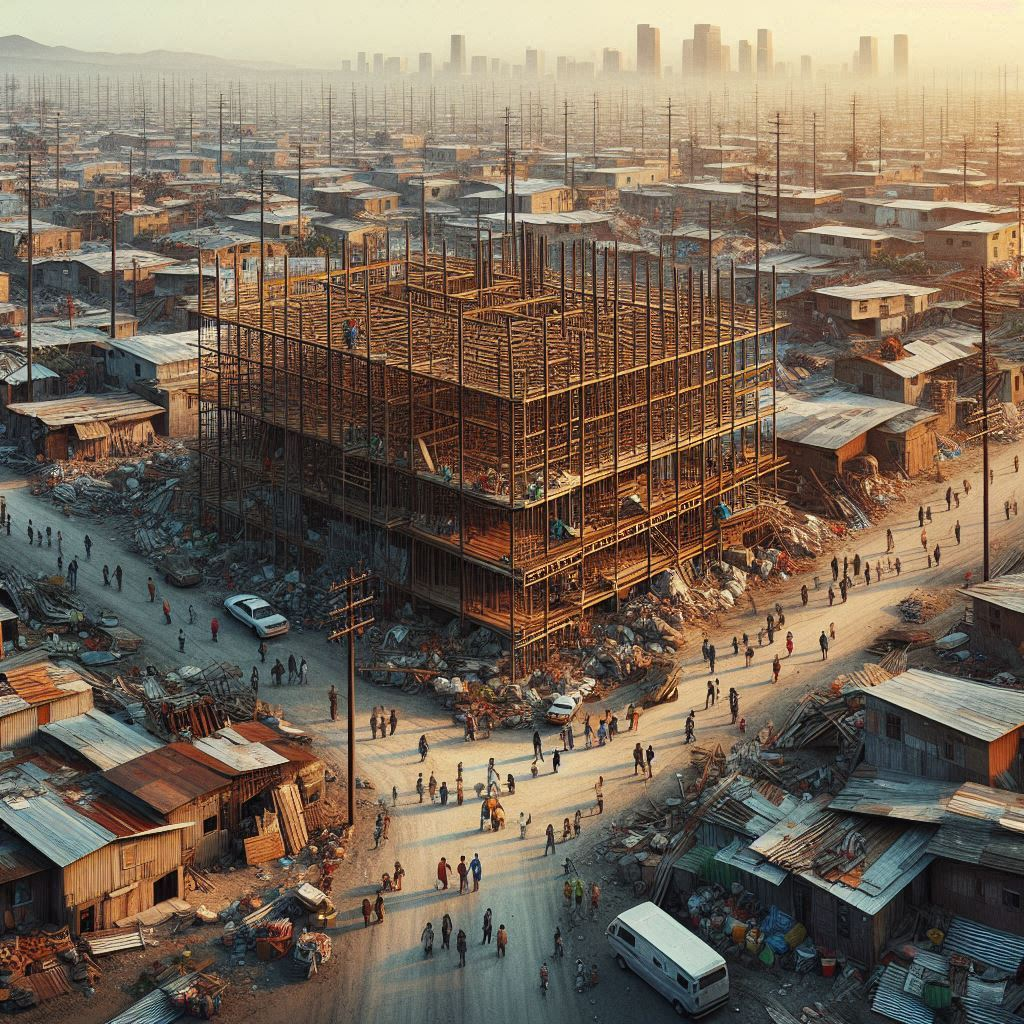


## Objetivos


### Objetivo general
Diseñar e implementar computacionalmente un modelo matemático que permita determinar la deflexión de una viga en voladizo a través de la solución de una ecuación polinomial. 

### Objetivos específicos




* Utilizar herramientas de Python para la solución de eacuaciones polinomiales.
* Hacer uso del teorema de los ceros racionales para encontrar las raíces de una ecuación polinomial.
* Determinar las propiedades específicas de una función polinomial (raíces, dominio, rango).


## Contenido de apoyo

### Usando Python para resolver ecuaciones polinomiales

Hemos usado la librería SymPy en modulos anteriores para resolver ecuaciones algebraicas. En este caso, vamos a usar la función `solve` de SymPy para encontrar las raíces de una ecuación polinomial. En este punto debemos indicar que la función `solve` de SymPy no es capaz de encontrar todas las raíces de una ecuación polinomial, pero si es capaz de encontrar las raíces racionales de una ecuación polinomial. Por ello es fundamental tener presente el teorema de los ceros racionales que enuncia que si una ecuación polinomial tiene raíces racionales, estas raíces son de la forma $p/q$ donde $p$ es un divisor del término independiente y $q$ es un divisor del coeficiente del término de mayor grado.

Ilustemos con un ejemplo el uso  de SymPy para encontrar las raíces de una ecuación polinomial. (Asumiendo que tiene ceros racionales)



In [1]:
import sympy as sp


# Definir la variable
x = sp.symbols('x')

# Definir el polinomio
polinomio = 2*x**4 +x**3 - 15*x**2 - 7*x + 7

display('Polinomio: ', polinomio)


'Polinomio: '

2*x**4 + x**3 - 15*x**2 - 7*x + 7

Como siempre, en SymPy, primero debemos importar la librería y definir las variables simbólicas que vamos a usar. En este caso el polinomio es de grado 3.

`SimPy` nos permite extraer los coeficientes de un polinomio de la siguiente manera:


In [2]:
from sympy import Poly
# Obtener los coeficientes del polinomio
coef = Poly(polinomio).all_coeffs()
print(coef)

[2, 1, -15, -7, 7]


`Poly` es una función de SymPy que nos permite extraer los coeficientes de un polinomio. En este caso, `Poly` recibe como argumento el polinomio y al usar la función `all_coeffs` nos devuelve los coeficientes del polinomio que es la lista que puedes ver impresa al ejecutar la celda de código.

Como queremos usar el teorema de los ceros racionales, es necesario encontrar los divisores del término independiente y del coeficiente del término de mayor grado. Para ello, vamos a usar la función `divisors` de la librería `SymPy`.

In [3]:
from sympy import divisors
# Se calculans los divisores del coeficiente principal y del término independiente
divisores_a = divisors(abs(coef[0]))# divisores del priemr coeficiente
divisores_i = divisors(abs(coef[-1]))#divisores del último coeficiente
print("Divisores del coeficiente principal: ",divisores_a)
print("Divisores del término independiente: ",divisores_i)

Divisores del coeficiente principal:  [1, 2]
Divisores del término independiente:  [1, 7]


Ahora calculamos la lista de posibles raices racionales de la ecuación polinomial.

In [4]:
# Calcular las posibles raíces racionales

posible_raiz_rac = [i/a for a in divisores_a for i in divisores_i] + [-i/a for a in divisores_a for i in divisores_i]# Se añaden los opuestos aditivos de cada posible raíz racional

print("Posibles raíces racionales: ",posible_raiz_rac)


Posibles raíces racionales:  [1.0, 7.0, 0.5, 3.5, -1.0, -7.0, -0.5, -3.5]


La primera línea de código crea una lista llamada posible_raiz que contiene el resultado de dividir cada elemento `i` en la lista `divisores_i` por cada elemento `a` en la lista `divisores_a`. Esto se hace utilizando una forma concisa de generar listas en Python que no es importante entender en detalle en este curso.

La segunda línea de código añade a la lista `posible_raiz` los opuestos aditivos de los elementos de la lista generada en la primera línea. Esto se hace para tener en cuenta que las raíces de un polinomio pueden ser tanto positivas como negativas. A esta nueva lista se le llama `posible_raiz_rac`.



Ahora queremos ver cuáles de estas posibles raíces son raíces de la ecuación polinomial. Para ello, haremos uso de la versatilidad de las listas en Python (de nuevo, no hace falta entender los detalles de este manejo de listas en este curso).


In [5]:

# verificar cuales de las raices extraídas son en realidad raices del polinomio
raices = [raices for raices in posible_raiz_rac if polinomio.subs(x, raices) == 0]
print("Raíces racionales: ",raices)

Raíces racionales:  [0.5, -1.0]


Para efectos de claridad , es necesario indicar que `subs` es un método de  `sympy` que sustituye una variable por un valor dado. En este caso, `polinomio.subs(x, raices)` está sustituyendo la variable $x$ en el polinomio por el valor de raices.

Por ejemplo, si polinomio es `x**2 + 2*x + 1 ` (que representa el polinomio $x^2 + 2x + 1$), y raices es 2, entonces `polinomio.subs(x, raices)` devolverá 9, que es el resultado de evaluar el polinomio en x=2.

Al igual que en módulos anteriores, podemos usar matplotlib para graficar una  función polinomial y ver gráficamente las raíces de la ecuación polinomial.


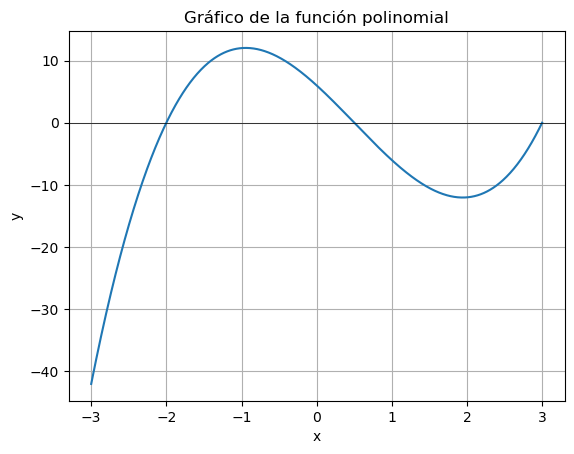

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generar los puntos para el gráfico
x = np.linspace(-3, 3, 1000)  # Ajustar el rango de valores de x y aumentar la resolución

# Evaluar la función polinomial directamente en los valores de x
y = 2*x**3 - 3*x**2 - 11*x + 6

# Graficar la función
plt.plot(x, y)
plt.axhline(0, color='black', linewidth=0.5)  # Agregar una línea en y=0
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de la función polinomial')
plt.grid(True)
plt.show()

Podrías indicar cuales son los ceros de la función anterior usando la grafica?. Contrasta con los ceros usando los pasos dados en el ejmplo anterior.

La siguiente celda te permite interactuar con la gráfica de la función polinomial. Puedes cambiar los valores de los coeficientes del polinomio y ver cómo cambia la gráfica (el grado máximo posible es 10)

In [1]:
import requests
# URL del archivo
url = "https://raw.githubusercontent.com/abelalv/PUJ_MMAF/main/libreria5.py"
# Descargar el archivo
response = requests.get(url)
with open('libreria5.py', 'w') as file:
    file.write(response.text)


In [2]:
# Importa la función desde la biblioteca
from libreria5 import crear_widget_polinomio

# Llama a la función para mostrar los widgets y la gráfica
crear_widget_polinomio()


IntSlider(value=0, description='Grado', max=10)

Output()

## Apropiación y aplicación del contenido
1. Considere una función de la forma $f(x)=x^2 + ax$ con $a\in \mathbb{R}$. 
 a. Cuando $a>0$ que ocurre con la parábola cuando $a$ se incrementa?
 b. Cuando $a<0$ que ocurre con la parábola cuando $a$ disminuye?
2. Escriba un polinomio con raíces raíces dadas por : 1,2,3,4
3. Identifique las raices y la multiplicidad de estas raíces para el polinomio $f(x)=(x-1)(x+2)^2(x-4)^3$
4. Grafica la función $f(x)=\dfrac{1}{x^2-2x+1}$. Como se comporta la función cerca de $x=1$? que pasa con valores de $x$ cercanos a 1 por la izquierda y por la derecha?

## Familiaridad con el reto

Una viga de longitud $L$ está apoyada en sus extremos. Un peso $P$ está colocado en el centro de la viga. La viga se deforma bajo la carga, y la deflexión $y(x)$ de la viga en cualquier punto y a lo largo de su longitud se puede modelar con una función polinomial dada por:
$$\dfrac{P}{48EI}(3L^2x-4x^3)=0$$
 Se te pide encontrar  
 
 1. los puntos donde la deflexión es cero (es decir, los puntos donde la viga toca los apoyos).



 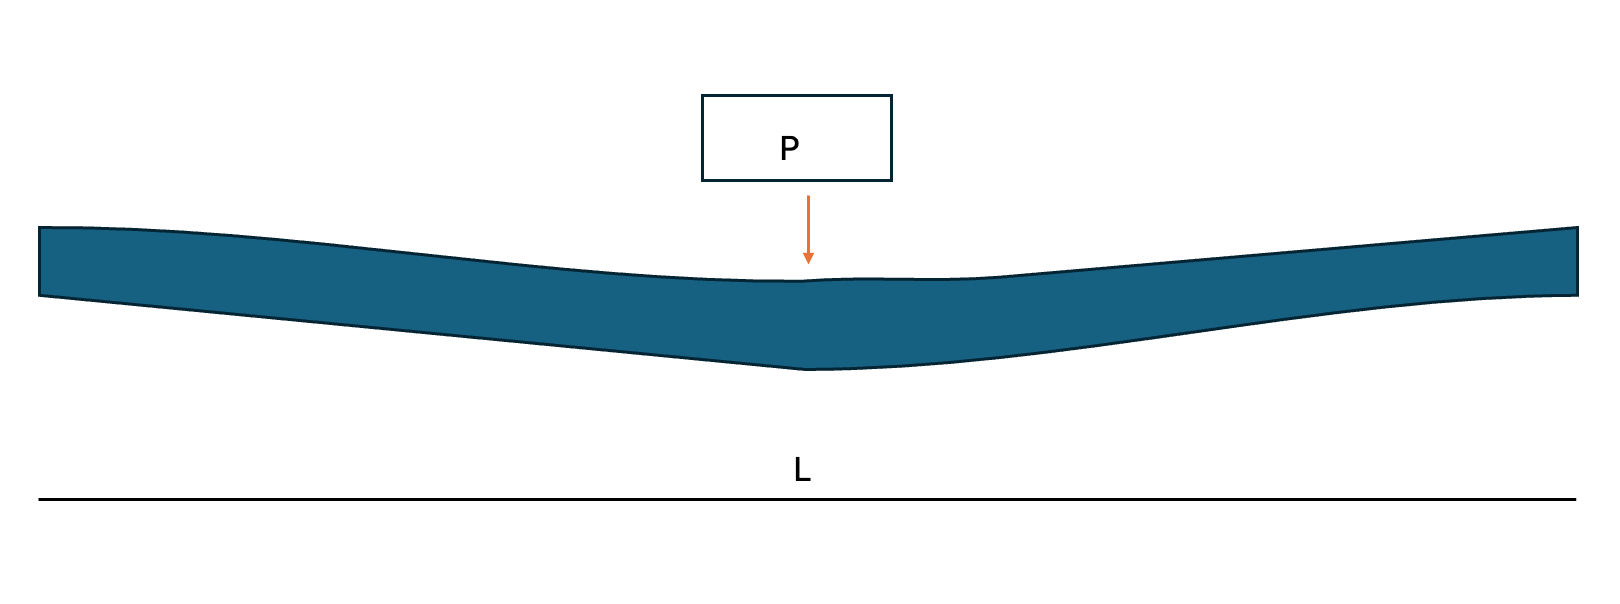

La solución analítica corresponde a resolver la ecuación $y(x)=0$, es decir, pasando a multiplicar $48EI$ y  a dividir $P$, la ecuación anterior se puede reescribir como
$$3L^2x-4x^3=0$$ 
Esta ecuación es una ecuación cúbica, la cual se puede factorizar  o resolver con los métodos vistos en el curso y se obtiene que las raíces son $x=0$, $x=\dfrac{L\sqrt{3}}{2}$ y $x=-\dfrac{L\sqrt{3}}{2}$.

**Nota que en esta expresión, $L, P, E$ y $I$ son constantes, por lo que la solución solo depende de $x$.**

In [1]:
import sympy as sp
from IPython.display import Math  # imprime en un formato legible 
# Definir las variables simbólicas
x, L, P, E, I = sp.symbols('x L P E I')

# Definir la ecuación de la deflexión
y = P / (48 * E * I) * (3 * L**2 * x - 4 * x**3)
display(y)
# Encontrar los puntos donde la deflexión es cero
soluciones = sp.solve(y, x)

# Imprimir las soluciones
for i, sol in enumerate(soluciones, start=1):
    display(Math(f"Solución  { i}: {sp.latex(sol)}"))


P*(3*L**2*x - 4*x**3)/(48*E*I)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

2. Grafica la funcion $y(x)$ en el intervalo $[-L,L]$ y determina si la solución analítica es correcta

3. Tiene sentido que la deflexión sea negativa? Explica tu respuesta

![](figura_reto_5.png)